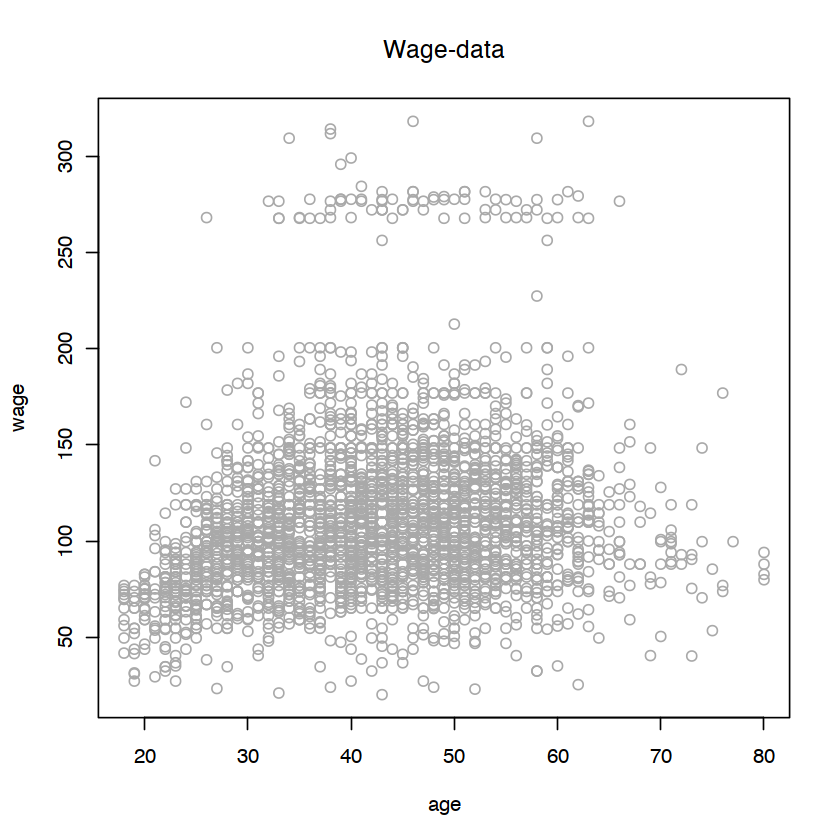

In [1]:
library(ISLR)
attach(Wage)
plot(age, wage, main="Wage-data", xlab="age", ylab="wage", col="darkgrey")

# Ploynomial Regression

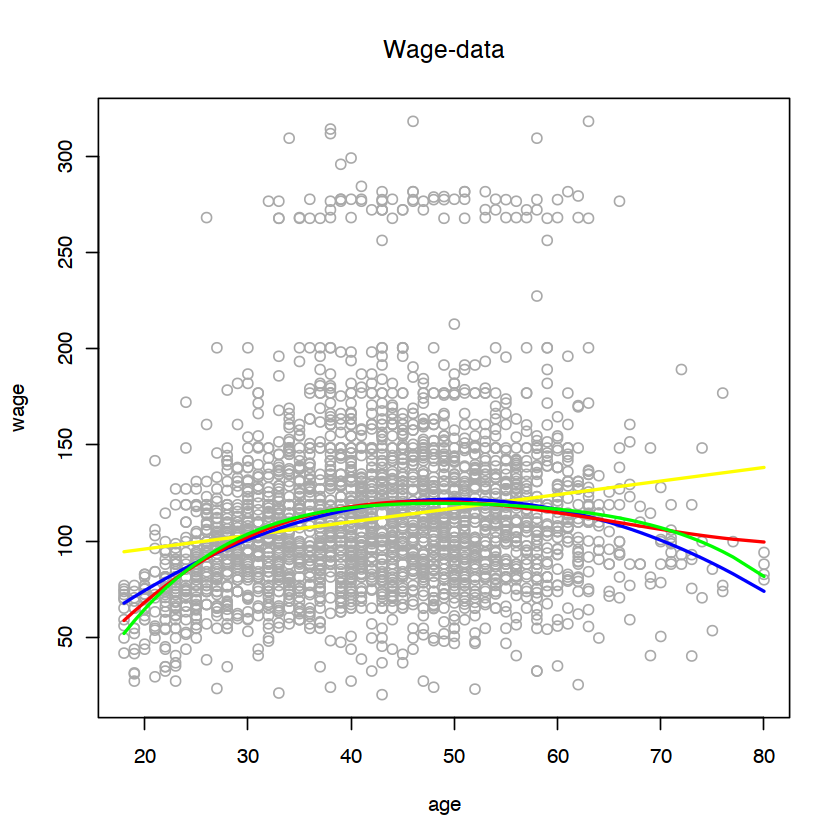

In [3]:
fit1 = lm(wage~age, data=Wage)
fit2 = lm(wage~age+I(age^2), data=Wage)
fit3 = lm(wage~cbind(age, age^2, age^3), data=Wage)
fit4 = lm(wage~poly(age,4), data=Wage)

plot(age, wage, main="Wage-data", xlab="age", ylab="wage", col="darkgrey")
lines(sort(age), fit1$fitted.values[order(age)], col="yellow", lwd=2)
lines(sort(age), fit2$fitted.values[order(age)], col="blue", lwd=2)
lines(sort(age), fit3$fitted.values[order(age)], col="red", lwd=2)
lines(sort(age), fit4$fitted.values[order(age)], col="green", lwd=2)

## Add standard error bands

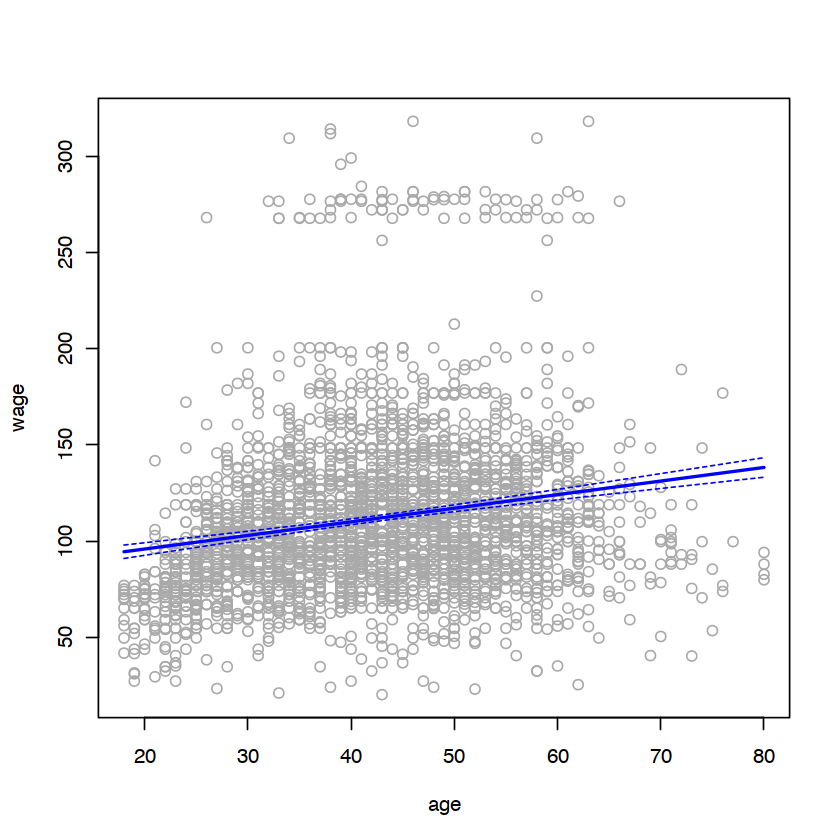

In [4]:
age.grid = seq(from=min(age), to=max(age))
preds1   = predict(fit1, newdata=list(age=age.grid), se=TRUE)
se.bands = cbind(preds1$fit+2*preds1$se, preds1$fit-2*preds1$se)
plot(age, wage, col="darkgrey")
lines(age.grid, preds1$fit, lwd=2, col="blue")
matlines(age.grid, se.bands, col="blue", lty=2)

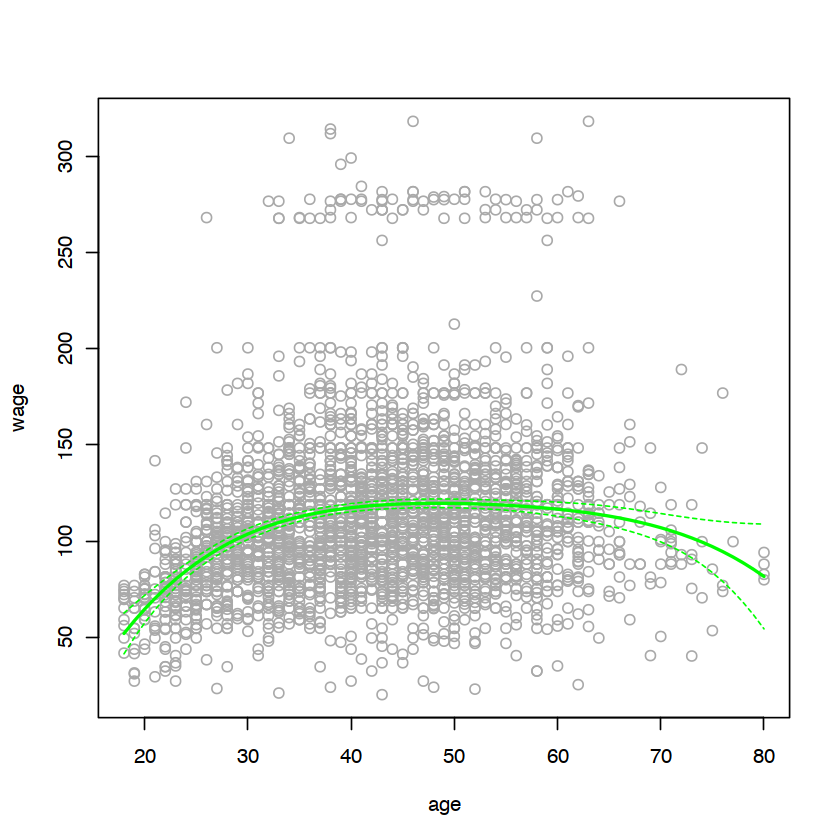

In [5]:
agelims   = range(age)
age.grid  = seq(from=agelims[1], to=agelims[2])
preds4    = predict(fit4, newdata=list(age=age.grid), se=TRUE)
se.bands  = cbind(preds4$fit+2*preds4$se, preds4$fit-2*preds4$se) 
plot(age, wage, col="darkgrey")
lines(age.grid, preds4$fit, lwd=2, col="green")
matlines(age.grid, se.bands, col="green", lty=2)

# Step Function


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

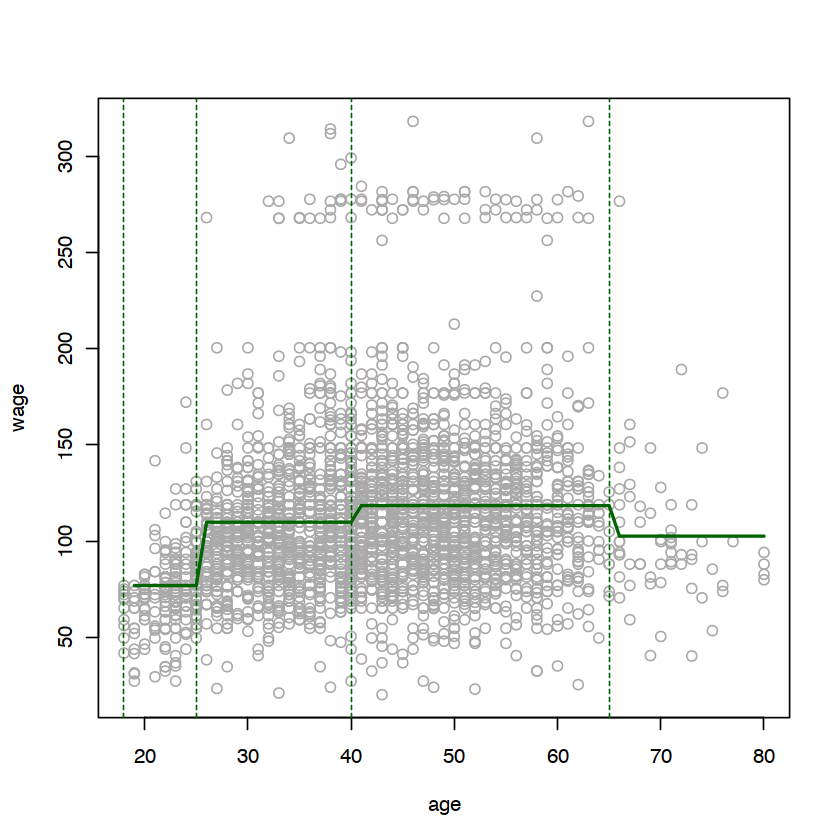

In [6]:
table(cut(age, 4)) #automatically picked cutpoints at 33.5, 49, and 64.5
#you can use cut() fun with lm()
fitc = lm(wage~cut(age,4), data=Wage) 
#you can aslo use I() fun
fitc = lm(wage~I(age>50), data=Wage)
#or create knots first
age.knots = c(50)
age.knots = c(18, 25, 40, 65, 90)
fitc = lm(wage~cut(age, age.knots), data=Wage)

plot(age, wage, col="darkgrey")
abline(v=age.knots, lty=2, col="darkgreen")
lines(age.grid, predict(fitc,list(age=age.grid)), col="darkgreen", lwd=2)

## Piecewise Polynomials

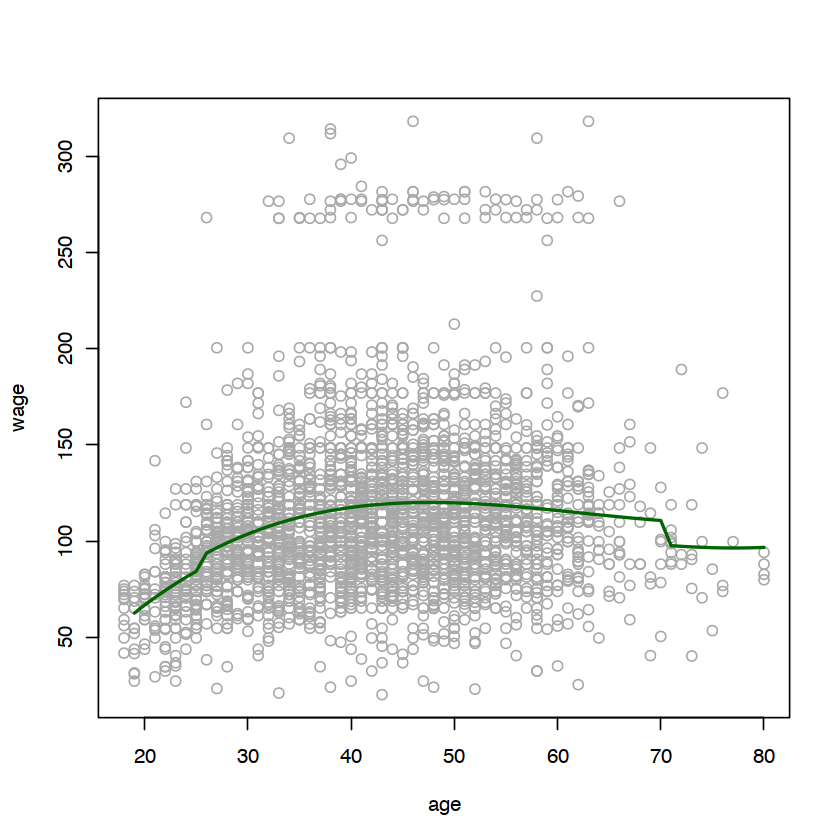

In [7]:
fitc = lm(wage~age+I(age>50), data=Wage)
fitc = lm(wage~age+cut(age, age.knots), data=Wage)
fitc = lm(wage~age+I(age^3)+I(age>50), data=Wage)
fitc = lm(wage~poly(age,3)+cut(age, c(18,25,70,90)), data=Wage)

plot(age, wage, col="darkgrey")
#abline(v=age.knots, lty=2, col="darkgreen")
lines(age.grid, predict(fitc,list(age=age.grid)), col="darkgreen", lwd=2)

# Splines

In [8]:
library(splines)
age.knots = c(25,40,65)
#age.knots = c(50)
fit1 = lm(wage~bs(age, knots=age.knots, degree=1), data=Wage)
fit2 = lm(wage~bs(age, knots=age.knots), data=Wage) #default degree is 3
fit3 = lm(wage~bs(age, df=4), data=Wage)

In [9]:
# df = knots + degree (default = 3)
attr(bs(age, df=5, degree=2), "knots") 

25%   50%   75% 
33.75 42.00 51.00

DF = 5 = 2 degrees + 3 knots above

In [10]:
attr(bs(age, df=4), "knots") #need 4 when degree default=3

50% 
 42

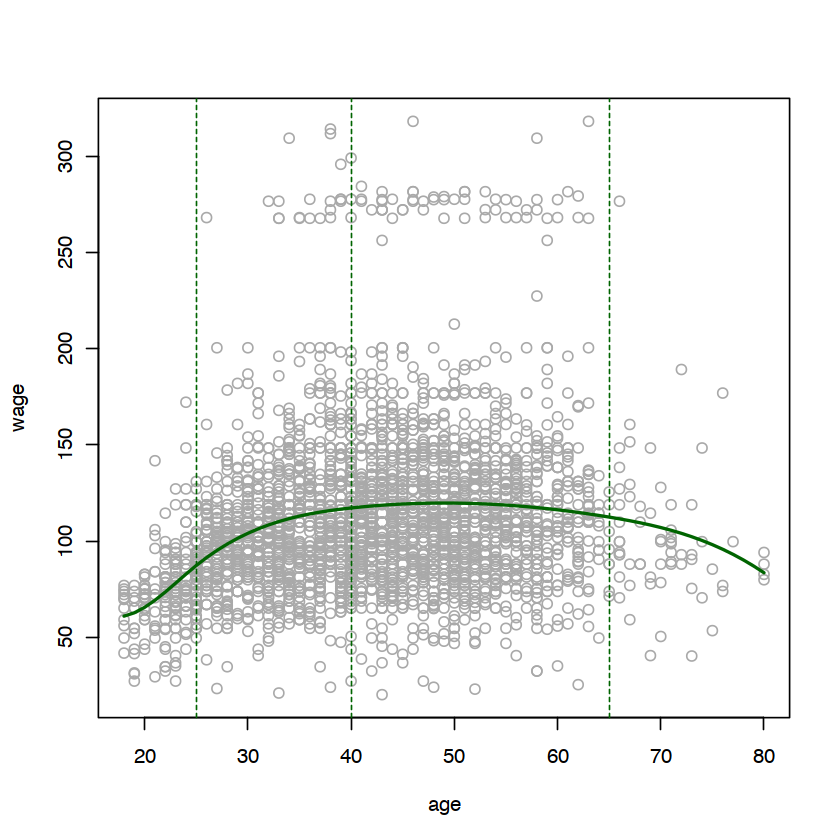

In [12]:
plot(age, wage, col="darkgrey")
abline(v=age.knots, lty=2, col="darkgreen")
lines(age.grid, predict(fit2, list(age=age.grid)), col="darkgreen", lwd=2)

# Natural spline

In [14]:
fit1 = lm(wage~ns(age, knots=age.knots), data=Wage)
fit2 = lm(wage~ns(age, df=4), data=Wage)
attr(ns(age, df=5), "knots") 
#  df - 1 - intercept knots  = 5 -1 

20% 40% 60% 80% 
 32  39  46  53

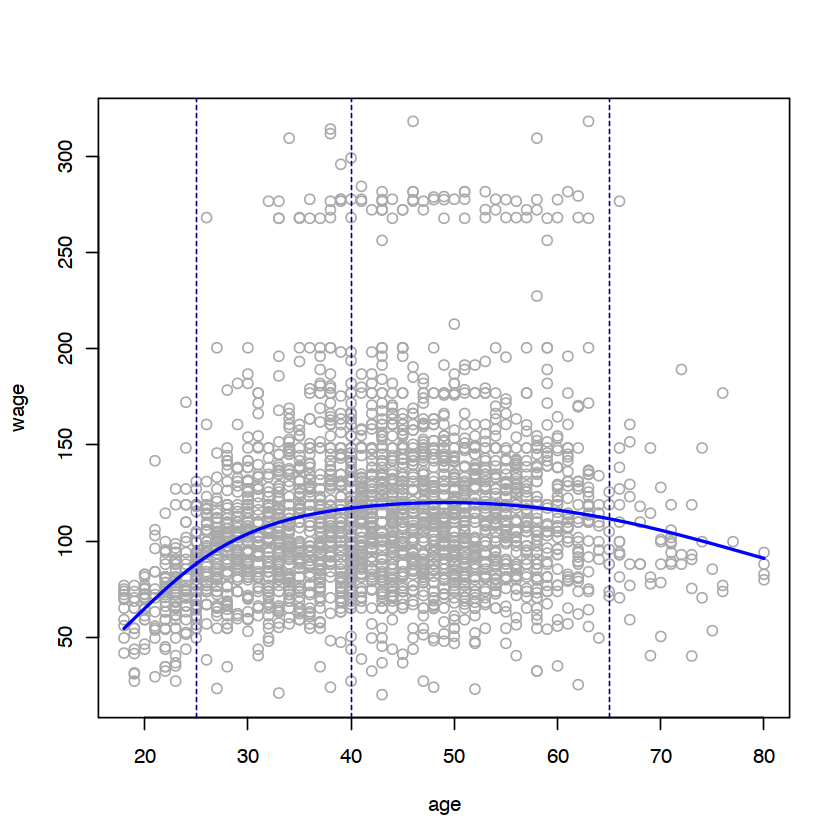

In [15]:
plot(age, wage, col="darkgrey")
abline(v=age.knots, lty=2, col="darkblue")
pred = predict(fit1, list(age=age.grid))
lines(age.grid, pred, col="blue", lwd =2)

In [16]:
dim(bs(age, knots=c(25,40,60))) 
dim(bs(age, df=6))
attr(bs(age, df=6), "knots")

[1] 3000    6

[1] 3000    6

25%   50%   75% 
33.75 42.00 51.00

In [17]:
dim(ns(age, knots=c(25,40,60))) 
dim(ns(age, df=6))
attr(ns(age, df=6), "knots")

[1] 3000    4

[1] 3000    6

16.66667% 33.33333%       50% 66.66667% 83.33333% 
       30        37        42        48        54

# Smoothing spline

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”


[1] 6.794596

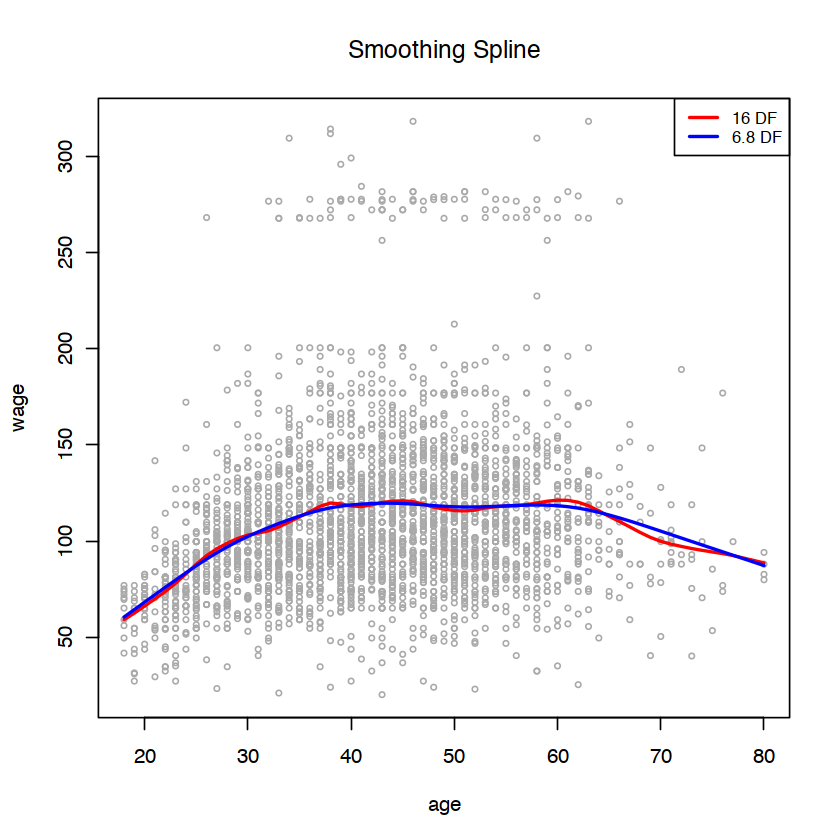

In [18]:
plot(age, wage, xlim=agelims, cex=.5, col="darkgrey")
title (" Smoothing Spline ")
fit1 = smooth.spline(age, wage, df=16)
fit2 = smooth.spline(age, wage, cv=TRUE)
fit2$df
lines(fit1, col="red",  lwd=2)
lines(fit2, col="blue", lwd=2)
legend ("topright", legend=c("16 DF","6.8 DF"), col=c("red","blue"), lty=1, lwd=2, cex=.8)

# Generalized Additive Models

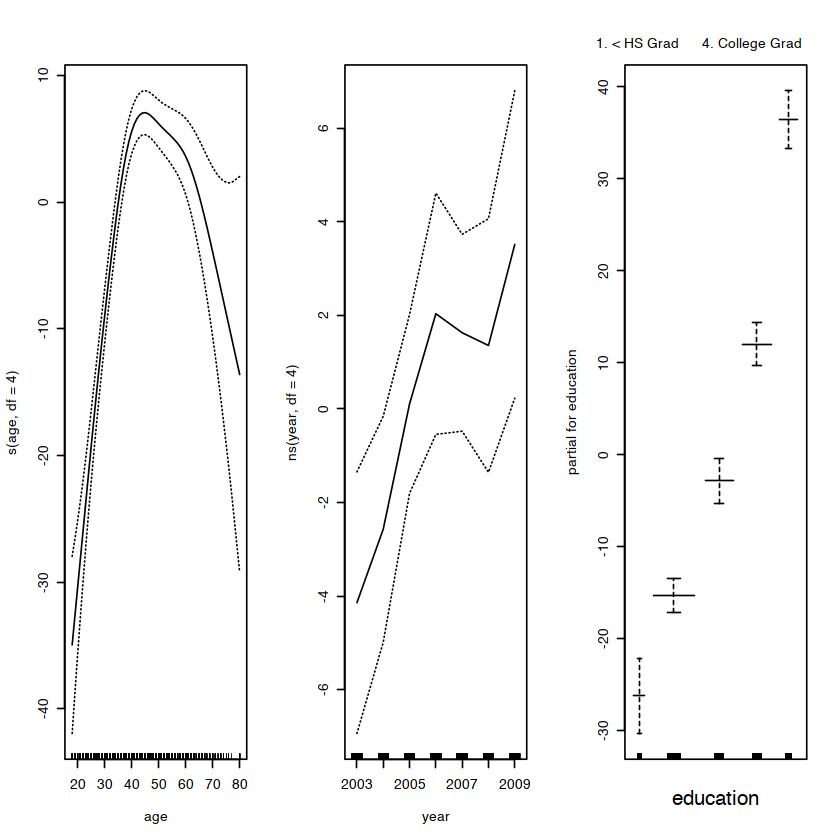

In [26]:
require(gam)

gam1=gam(wage~s(age,df=4)+ns(year,df=4)+education,data=Wage)
par(mfrow=c(1,3))
plot(gam1,se=T)

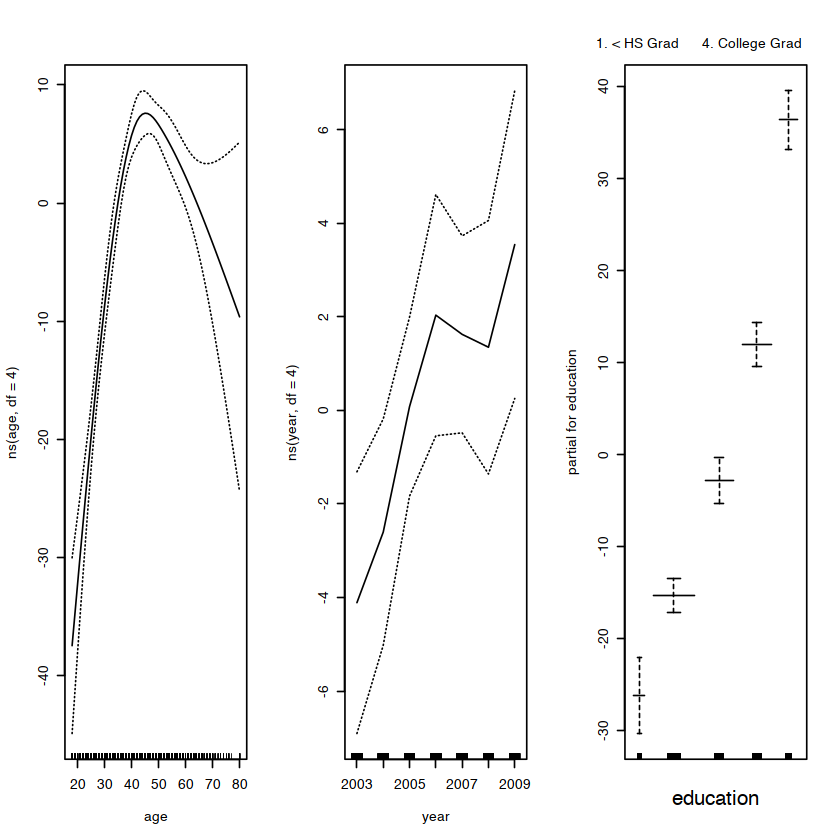

In [27]:
lm1=lm(wage~ns(age,df=4)+ns(year,df=4)+education,data=Wage)
par(mfrow=c(1,3))
plot.Gam(lm1,se=T)